# N-D

To explore higher dimensional data and the relationships between data attributes, we'll load in the file `Diabetes.csv`. It's from [from Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_original = pd.read_csv("Diabetes.csv")
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
cols = [c for c in df_original.columns if c not in ["Pregnancies", "Outcome"]]
df = df_original.copy()
df[cols] = df[cols].replace({0: np.NaN})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# Actually viewing the data

So, surprisingly noone, its actually useful to view the data. Straight up by using head we can see that this dataset is utilising `0` to represent no value - unless some poor unfortunate soul actually has a skin thickness of 0. 

If we want to do more than expect the data, we can use the `describe` function we talked about in the previous section

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Scatter Matrix

This one is a useful one liner... but note that it only works with numeric data. If you want to include categorical data in there you should convert the categories into numeric labels.

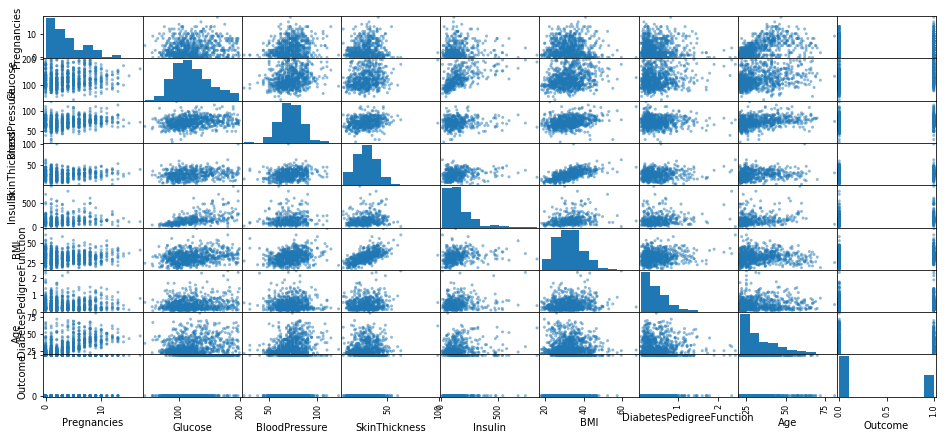

In [6]:
pd.plotting.scatter_matrix(df, figsize=(16, 7));

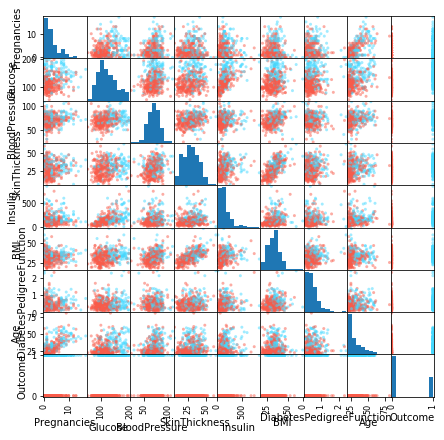

In [7]:
df2 = df.dropna()
colors = df2["Outcome"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize=(7,7), color=colors);

The scatter plot gives us both the histograms for the distributions along the diagonal, and also a lot of 2D scatter plots off-diagonal. Not that this is a symmetric matrix, so I just look at the diagonal and below it normally. We can see that some variables have a lot of scatter and some are correlated (ie there is a direction in their scatter). Which leads us to...

# Correlation Plots

To easily quantify which variables / attributes are correlated with others!

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


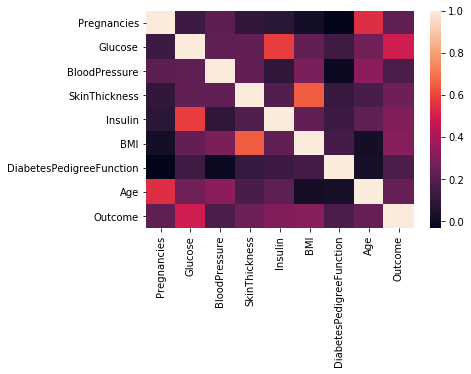

In [9]:
sb.heatmap(df.corr());

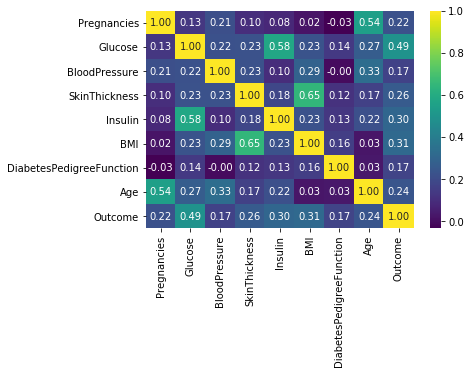

In [10]:
sb.heatmap(df.corr(), annot=True, cmap="viridis", fmt="0.2f");

And you can see this is a symmetric matrix too. But it immedietly allows us to point out the most correlated and anti-correlated attributes. Some might just be common sense - Pregnancies v Age for example - but some might give us real insight into the data.


# 2D Histograms

For the rest of this section, we're going to use a different dataset which has more data in it. 

Useful when you have a *lot* of data. [See here for the API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html)

In [11]:
df2 = pd.read_csv("height_weight.csv")
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
sex       4231 non-null int64
height    4231 non-null float64
weight    4231 non-null float64
dtypes: float64(2), int64(1)
memory usage: 99.2 KB


,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


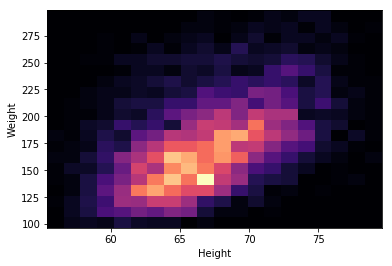

In [12]:
plt.hist2d(df2["height"], df2["weight"], bins=20, cmap="magma")
plt.xlabel("Height")
plt.ylabel("Weight");

# Contour plots

Bit hard to get information from the 2D histogram isnt it? Too much noise in the image. What if we try and contour diagram? We'll have to bin the data ourself. The [contour API is here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

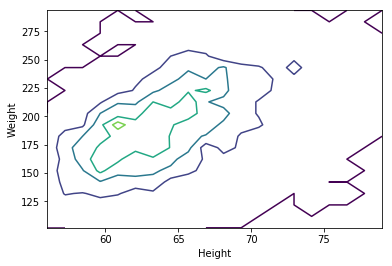

In [13]:
hist, x_edge, y_edge = np.histogram2d(df2["height"], df2["weight"], bins=20)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist, levels=4)
plt.xlabel("Height")
plt.ylabel("Weight");

Ouch, looks like its just as noisy with the contour plot! In general, for 2D histograms and contour plots, have a lot of data. We simply don't have enough data to get smooth results!

# KDE Plots

If only we could smooth the data ourselves. [Seaborn to the rescue!](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

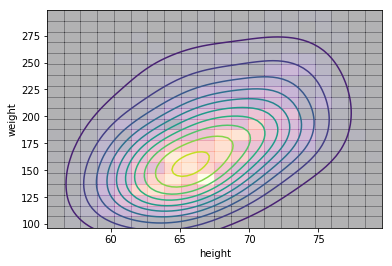

In [14]:
sb.kdeplot(df2["height"], df2["weight"], cmap="viridis", bw=(2, 20));
plt.hist2d(df2["height"], df2["weight"], bins=20, cmap="magma", alpha=0.3);

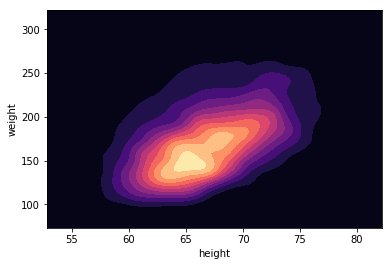

In [15]:
sb.kdeplot(df2["height"], df2["weight"], cmap="magma", shade=True);

# In Defense of Simplicity

Sometimes we don't need to go fancy. By pausing, taking stock of what we want to see, a scatter plot is normally fairly informative and very fast to plot.

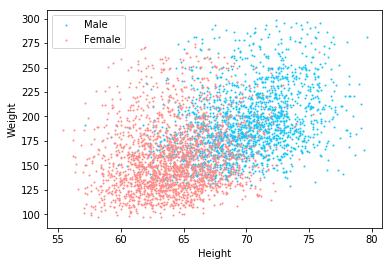

In [16]:
m = df2["sex"] == 1
plt.scatter(df2.loc[m, "height"], df2.loc[m, "weight"], c="#16c6f7", s=1, label="Male")
plt.scatter(df2.loc[~m, "height"], df2.loc[~m, "weight"], c="#ff8b87", s=1, label="Female")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc=2);

# Treating points with probability

Using the library ChainConsumer ([examples here](https://samreay.github.io/ChainConsumer/examples/index.html)). I wrote it, as I deal with MCMC chains and posterior samples for hours every day and needed better tools to analyse them.

ChainConsumer is not a standard anaconda package, so you'll need to run the below to install it.

`pip install chainconsumer`

Note that without LaTeX for fancy labels, set `usetex=False` in the `configure` method. I've done this below for your version of the code, its not in the video.

In [17]:
params = ["height", "weight"]
male = df2.loc[m, params].values
female = df2.loc[~m, params].values
male.shape

(1946, 2)

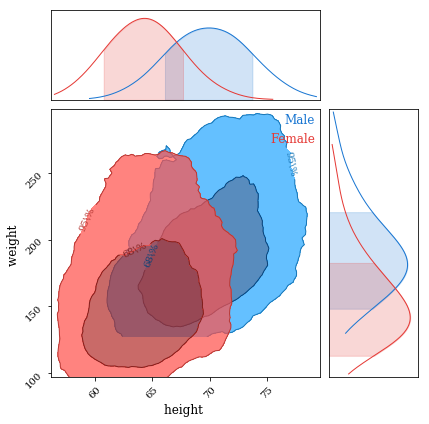

In [20]:
from chainconsumer import ChainConsumer
c = ChainConsumer()
c.add_chain(male, parameters=params, name="Male", kde=1.0, color="b")
c.add_chain(female, parameters=params, name="Female", kde=1.0, color="r")
c.configure(contour_labels="confidence", usetex=False)
c.plotter.plot(figsize=2.0);

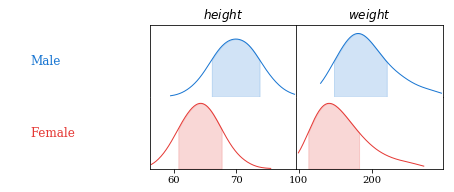

In [21]:
c.plotter.plot_summary(figsize=2.0);

Remember, when you're visualising, start simple and add complexity as the data seems to indicate. No point wasting your time getting in real deep when its not needed.

Oh and you might have noticed we've talked about a lot of plots, but not pie charts. Never use pie charts. Never.